In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import plot_model

In [2]:
#Get the Dataset
df=pd.read_csv(r'C:\Users\PC DOCTOR\Desktop\Project 1\MSFT.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-17,29.299999,29.639999,29.09,29.590000,24.036226,44206100
2012-10-18,29.650000,29.730000,29.26,29.500000,23.963112,59238500
2012-10-19,29.049999,29.080000,28.50,28.639999,23.264530,90470800
2012-10-22,28.730000,28.830000,27.83,28.000000,22.744658,83374000
2012-10-23,27.770000,28.200001,27.76,28.049999,22.785267,64414800


In [3]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df. shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (2766, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

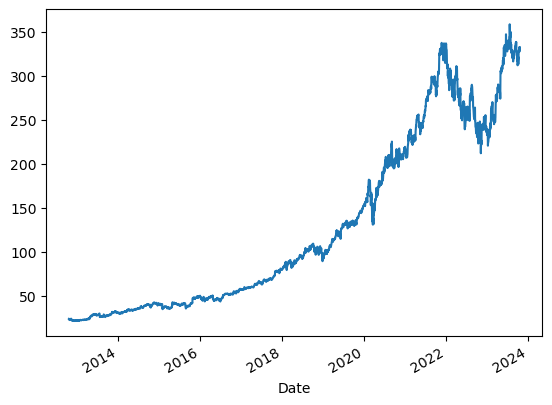

In [4]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [5]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [6]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2012-10-17,0.008707,0.008849,0.008676,0.152614
2012-10-18,0.009750,0.009114,0.009197,0.214989
2012-10-19,0.007961,0.007203,0.006867,0.344582
2012-10-22,0.007007,0.006468,0.004813,0.315135
2012-10-23,0.004145,0.004616,0.004599,0.236467


In [7]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

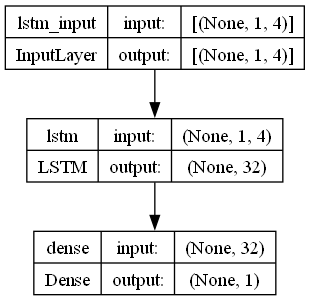

In [9]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [10]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
315/315 [==============================] - 4s 3ms/step - loss: 18803.1211
Epoch 2/100
315/315 [==============================] - 1s 3ms/step - loss: 16407.7578
Epoch 3/100
315/315 [==============================] - 1s 3ms/step - loss: 13544.1777
Epoch 4/100
315/315 [==============================] - 1s 3ms/step - loss: 10476.9873
Epoch 5/100
315/315 [==============================] - 1s 4ms/step - loss: 7622.1255
Epoch 6/100
315/315 [==============================] - 1s 4ms/step - loss: 5273.1514
Epoch 7/100
315/315 [==============================] - 1s 4ms/step - loss: 3548.1323
Epoch 8/100
315/315 [==============================] - 2s 5ms/step - loss: 2407.4534
Epoch 9/100
315/315 [==============================] - 2s 5ms/step - loss: 1701.0750
Epoch 10/100
315/315 [==============================] - 1s 4ms/step - loss: 1246.4290
Epoch 11/100
315/315 [==============================] - 1s 4ms/step - loss: 905.6450
Epoch 12/100
315/315 [==============================] - 1s 4

315/315 [==============================] - 1s 4ms/step - loss: 3.3363
Epoch 100/100
315/315 [==============================] - 1s 4ms/step - loss: 3.3271


In [11]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


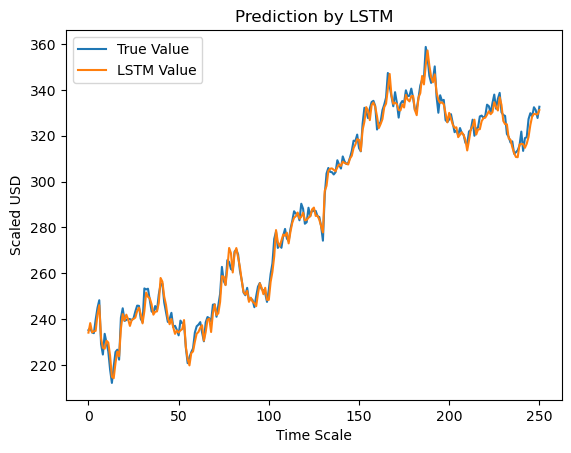

In [14]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()